Non-uniform random distributions
--------------------------------

In the previous section we learned how to generate random deviates with
a uniform probability distribution in an interval $[a,b]$. This
distributioon is normalized, so that $$\int _a^b {P(x)dx}=1.$$ Hence,
$P(x)=1/(b-a)$.

Now, suppose that we generate a sequence $\{x_i\}$ and we take some
function of it to generate $\{y(x_i)\}=\{y_i\}$. This new sequence is
going to be distributed according to some probability density $P(y)$,
such that $$P(y)dy=P(x)dx$$ or $$P(y)=P(x)\frac{dx}{dy}.$$

If we want to generate a desired normalized distribution $P(y)$, we need
to solve the differential equation: $$\frac{dx}{dy}=P(y).$$ But the
solution of this is $$x=\int _0^y {P(y')dy'}=F(y).$$ Therefore,
$$y(x)=F^{-1}(x),
$$ where $F^{-1}$ is the inverse of $F$.

### Exponential distribution

As an example, let us take $y(x)=-\ln{(x)}$ with $P(x)$ representing a
uniform distribution in the interval $[0,1]$. Then
$$P(y)=\frac{dx}{dy}=e^{-y},$$ which is distributed exponentially. This
distribution occurs frequently in real problems such as the radioactive
decay of nuclei. You can also see that the quantity $y/\lambda$ has the
distribution $\lambda
e^{-\lambda y}$.




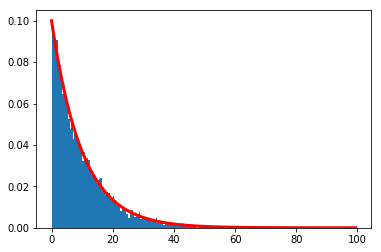

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 10000
r = np.random.random(N)

xlambda = 0.1
x = -np.log(r)/xlambda

binwidth=xlambda*5
pyplot.hist(x,bins=np.arange(0.,100., binwidth),density=True);
pyplot.plot(np.arange(0.,100.,binwidth),xlambda*np.exp(-xlambda*np.arange(0.,100.,binwidth)),ls='-',c='red',lw=3);

von Neumann rejection
---------------------
A simple and ingenious method for generating random points with a
probability distribution $P(x)$ was deduced by von Neumann. Draw a plot
with you probability distribution, and on the same graph, plot another
curve $f(x)$ which has finite area and lies everywhere above your
original distribution. We will call $f(x)$ the “comparison function”.
Generate random pairs $(x_i,y_i)$ with uniform distribution inside
$f(x)$. Whenever the point lies inside the area of the original
probability, we accept it, otherwise, we reject it. All the accepted
points will be uniformly distributed within the original area, and
therefore will have the desired distribution. The fraction of points
accepted/rejected will deppend on the ratio between the two areas. The
closer the comparison function $f(x)$ resembles $P(x)$, the more points
will be accepted. Ideally, for $P(x)=f(x)$, all the points will be
accepted, and none rejected. However, in practice, this is not always
possible, but we can try to pick $f(x)$ such that we minimize the
fraction of rejected points.

It only remains how to pick a number with probability $f(x)$. For this
purpose, we utilize the method shown in the previous section, using a
function whose indefinite intergral is know analytically, and is also
analytically invertible. We then pick a random number $x$ and retrieve
the corresponding $y(x)$ according to (\[random\_invert\]). Then, we
generate a second random number and we use the rejection criterion.

An equivalent procedure consists of picking the second number between 0
and 1 and accept or reject according to whether is it respectively less
than or greater than the ratio $P(x)/f(x)$. Clearly, if $f(x)=P(x)$ all the points will be accepted.



Acceptance Ratio:  0.1673


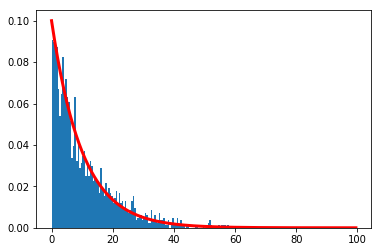

In [3]:
N = 10000

xmax = 60
ymax = xlambda

rx = np.random.random(N)*xmax
ry = np.random.random(N)*ymax

values = []

Nin = 0
for i in range(N):
    if(ry[i] <= xlambda*np.exp(-xlambda*rx[i])):
        # Accept
        values.append(rx[i])
        Nin += 1
        
x = np.asarray(values)

print("Acceptance Ratio: ",Nin/float(N))

binwidth=xlambda*5
#pyplot.hist(rx,bins=np.arange(0.,100., binwidth),density=True);
pyplot.hist(x,bins=np.arange(0.,100., binwidth),density=True);
pyplot.plot(np.arange(0.,100.,binwidth),xlambda*np.exp(-xlambda*np.arange(0.,100.,binwidth)),ls='-',c='red',lw=3);

#### Question 1:

How do you improve the acceptance ratio by using a linear function $f(x)=1-\alpha x$, with appropriate choice of $\alpha$

Random walk methods: the Metropolis algorithm
---------------------------------------------

Suppose that we want to generate random variables according to an
arbitrary probability density $P(x)$. The Metropolis algorithm produces
a “random walk” of points $\{x_i\}$ whose asymptotic probability
approaches $P(x)$ after a large number of steps. The random walk is
defined by a “transition probability” $w(x_i \rightarrow x_j)$ for one
value $x_i$ to another $x_j$ in order that the distribution of points
$x_0$, $x_1$, $x_2$, ... converges to $P(x)$. In can be shown that it is
sufficient (but not necessary) to satisfy the “detailed balance”
condition $$p(x_i)w(x_i \rightarrow x_j) = p(x_j)w(x_j \rightarrow x_i).
$$ This relation dos not specify $w(x_i \rightarrow x_j)$
uniquely. A simple choice is
$$w(x_i \rightarrow x_j)=\min{\left[ 1,\frac{P(x_j)}{P(x_i)} \right] }.$$
This choice can be described by the following steps. Suppose that the
“random walker” is a position $x_n$. To generate $x_{n+1}$ we

1.  choose a trial position $x_t=x_n+\delta _n$ , where the $\delta _n$
    is a random number in the interval $[-\delta ,\delta]$.

2.  Calculate $w=P(x_t)/P(x_n)$.

3.  If $w \geq 1$ we accept the change and let $x_{n+1}=x_t$.

4.  If $w \leq 1$, generate a random number $r$.

5.  If $r \leq w$, accept the change and let $x_{n+1} = x_t$.

6.  If the trial change is not accepted, the let $x_{n+1}=x_n$.

It is necessary to sample a number of points of the random walk before
the asymptotic probability $P(x)$ is attained. How do we choose the
“step size” $\delta$? If $\delta$ is too large, only a small fraction of
changes will be accepted and the sampling will be inefficient. If
$\delta$ is too small, a large number will be accepted, but it would
take too long to sample $P(x)$ over the whole interval of interest.
Ideally, we want at least 1/3-1/2 of the trial steps to be accepted. We
also want to choose $x_0$ such that the distribution $\{x_i\}$ converges
to $P(x)$ as quickly as possible. An obvious choice is to begin the
random walk at the point where $P(x)$ is maximum.

### Exercise 1: The Gaussian distribution

1.  Use the Metropolis algorithm to generate a Gaussian distribution
    $P(x)=A \exp{(-x^2/2\sigma ^2)}$. Is the numerical value of the
    normalization constant $A$ relevant? Determine the qualitative
    dependence of the acceptance ratio and the equilibrium time on the
    maximum step size $\delta$. One possible criterion for equilibrium
    is that $\langle x^2
    \rangle \approx \sigma ^2$. For $\sigma = 1$, what is a reasonable
    choice of $\delta$? (choose $x_0 = 0$.)

2.  Plot the asymptotic probability distribution generated by the
    Metropolis algorithm.
    

100.06836204183482
****************************** 
 acceptance ratio =  0.960656 
****************************** 


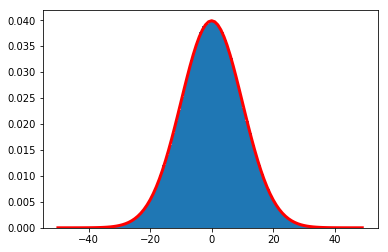

In [27]:
N = 1000000

x = np.zeros(N)
delta = 2.
sigma = 10.
sigma2 = sigma**2
diff=np.zeros(100)
diffvalue=np.zeros(N)
Naccept=0 
def metropolis(xold):
    xtrial = np.random.random()    
    xtrial = xold+(2*xtrial-1)*delta
    weight = np.exp(-0.5*(xtrial**2-xold**2)/sigma2)
    xnew = xold
    if(weight >= 1): #Accept
        xnew = xtrial
    else:
        r = np.random.random()
        if(r <= weight): #Accept
            xnew = xtrial
    return xnew
# Only here to get a better starting point
xwalker = 20.
Nwarmup = 500000
for i in range(Nwarmup):
    xwalker = metropolis(xwalker)
###
x[0] = xwalker
xavg2=x[0]**2
diffvalue[0]=abs(xavg2 - sigma2) / sigma2
for i in range(1,N):
    x0 = x[i-1]
    for j in range(10):
        x0 = metropolis(x0)
    x[i] = metropolis(x0)
    xavg2 += x[i]**2
    diff[i%100 -1]=abs(xavg2/(i+1) - sigma2) / sigma2
    diffvalue[i]=abs(xavg2/(i+1) - sigma2) / sigma2
    if (i%100 ==0):
        diffmean=np.mean(diff)
        #print ('i=',i,'diffmean=', diffmean)
   
    #print ('i=', i , 'diff=', diff)
    if (x[i]!=x0): # acceptance 
        Naccept+=1
        

xavg2=xavg2 / N
print (xavg2)
binwidth=sigma/10
pyplot.hist(x,bins=np.arange(-50,50., binwidth),density=True);

norm = 1./(sigma*np.sqrt(2*np.pi))
pyplot.plot(np.arange(-50.,50.,binwidth),norm*np.exp(-0.5*np.arange(-50.,50.,binwidth)**2/sigma2),ls='-',c='red',lw=3);

# Acceptance ratio:
ratio=Naccept/N
print ('****************************** \n acceptance ratio = ',ratio , '\n****************************** ')



Text(0, 0.5, '<x^2>-sigma ^2')

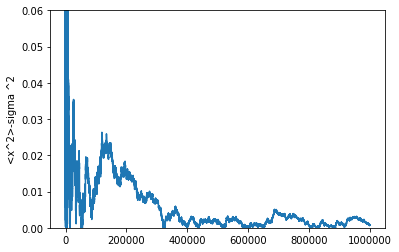

In [28]:
pyplot.plot(np.arange(0,N,1),diffvalue)
pyplot.ylim(0,0.06)
pyplot.ylabel('<x^2>-sigma ^2')